# Business Category EDA

Let's take a look at the "categories_b" column in our current dataframe yelp_df.pkl

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_pickle("data/yelp_df.pkl")
business_categories = df['categories_b']

In [3]:
# Count occurences of each category

start_time = time.time()

# Counts dictionary
b_category_counts = {}

# Iterate over reviews
for row in range(business_categories.shape[0]):
    
    # Skip nones
    if business_categories[row] is None:
        continue
    
    # Cut whitespace
    categories = set(business_categories[row].split(","))
    
    # Increment dictionary entries
    for cat in categories:
        if cat[0] == " ":
            cat = cat[1:]
        if cat in b_category_counts.keys():
            b_category_counts[cat] += 1
        else:
            b_category_counts[cat] = 1
            
end_time = time.time()
print("Time for execution {}".format(end_time - start_time))

Time for execution 260.0804159641266


# Results

In [4]:
print("Number of business categories in dataset: {}".format(len(b_category_counts.keys())))

Number of business categories in dataset: 1300


In [5]:
# Sort values and print 
sorted_vals = []
for key in b_category_counts.keys():
    sorted_vals.append((key, b_category_counts[key]))
sorted_vals = sorted(sorted_vals, key=lambda x: x[1], reverse = True)
for i in sorted_vals:
    print("{}, {}".format(i[0], i[1]))

Restaurants, 4201684
Food, 1511092
Nightlife, 1202166
Bars, 1101265
American (Traditional), 733103
American (New), 729264
Breakfast & Brunch, 646334
Event Planning & Services, 549982
Shopping, 519479
Sandwiches, 475626
Beauty & Spas, 432557
Arts & Entertainment, 417708
Mexican, 401693
Burgers, 395129
Pizza, 394428
Italian, 392125
Hotels & Travel, 343194
Seafood, 343191
Coffee & Tea, 342738
Japanese, 309510
Home Services, 288567
Desserts, 274142
Automotive, 267164
Chinese, 261527
Sushi Bars, 254215
Health & Medical, 252519
Salad, 249166
Steakhouses, 243536
Asian Fusion, 240279
Hotels, 233216
Fast Food, 230464
Active Life, 222098
Cafes, 217132
Specialty Food, 210906
Local Services, 209375
Bakeries, 187470
Cocktail Bars, 182655
Wine & Spirits, 179919
Beer, 179919
Barbeque, 173000
Sports Bars, 166759
Pubs, 163658
Caterers, 153516
Wine Bars, 152057
Lounges, 151641
Casinos, 149496
Nail Salons, 148193
Vegetarian, 147302
Auto Repair, 141269
Mediterranean, 139385
Venues & Event Spaces, 138171
T

(array([1.251e+03, 2.800e+01, 1.000e+01, 4.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.00000000e+00, 1.40059033e+05, 2.80115067e+05, 4.20171100e+05,
        5.60227133e+05, 7.00283167e+05, 8.40339200e+05, 9.80395233e+05,
        1.12045127e+06, 1.26050730e+06, 1.40056333e+06, 1.54061937e+06,
        1.68067540e+06, 1.82073143e+06, 1.96078747e+06, 2.10084350e+06,
        2.24089953e+06, 2.38095557e+06, 2.52101160e+06, 2.66106763e+06,
        2.80112367e+06, 2.94117970e+06, 3.08123573e+06, 3.22129177e+06,
        3.36134780e+06, 3.50140383e+06, 3.64145987e+06, 3.78151590e+06,
        3.92157193e+06, 4.06162797e+06, 4.20168400e+06]),
 <a list of 30 Patch objects>)

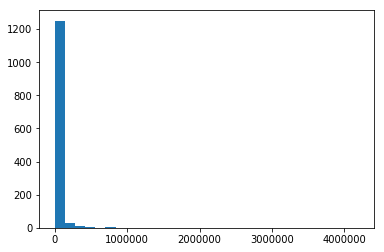

In [6]:
# Plot count distribution
counts = []
for val in sorted_vals:
    counts.append(val[1])
plt.hist(counts, bins = 30)

Based on the number of 1300 categories, I propose one-hot encoding all categories and zero imputing missing values. We still have much more data than predictors: $$1300 \ll n \approx 3,000,000$$  